# Stock Price Prediction in Linear Regression
Predicting the stock price trend by interpreting the seemly chaotic market data has
always been an attractive topic to both investors and researchers. Among those popular
methods that have been employed, Machine Learning techniques are very popular due to
the capacity of identifying stock trend from massive amounts of data that capture the
underlying stock price dynamics. In this project, we applied linear regression methods
to stock price trend forecasting.

In [1]:
import pandas as pd
import numpy as np
import datetime
import pandas_datareader.data as web
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from matplotlib import style
from sklearn import preprocessing
from sklearn import linear_model
import quandl, math
quandl.ApiConfig.api_key = "_1LjZZVx4HVVTwzCmqxg"

### Use simple stock market daily data as features


In [2]:
#get stock basic data from quandl
df = quandl.get('WIKI/AAPL',start_date="1996-9-26",end_date='2017-12-31')

df = df[['Adj. Open','Adj. High','Adj. Low','Adj. Close','Adj. Volume']]
#calculate highest and lowest price change
df['HL_PCT']=(df['Adj. High']-df['Adj. Low'])/df['Adj. Close'] *100.0
#calculate return of stock price
df['PCT_change']= (df['Adj. Close']-df['Adj. Open'])/df['Adj. Open'] *100.0

df = df[['Adj. Close','HL_PCT','PCT_change','Adj. Volume']]
df_orig=df
date = df.index
df.head()

,Adj. Close,HL_PCT,PCT_change,Adj. Volume
Date,,,,
1996-09-26,0.718714,1.117568,0.000000,25821600.0
1996-09-27,0.716786,1.120574,0.269663,20392400.0
1996-09-30,0.712931,1.126634,0.316456,21361200.0
1996-10-01,0.791003,11.169781,11.909091,134811600.0
1996-10-02,0.758875,6.350550,0.000000,69204800.0


             Adj. Close    HL_PCT  PCT_change  Adj. Volume
Adj. Close     1.000000  0.463627    0.004388     0.308070
HL_PCT         0.463627  1.000000    0.006221     0.433216
PCT_change     0.004388  0.006221    1.000000     0.000262
Adj. Volume    0.308070  0.433216    0.000262     1.000000


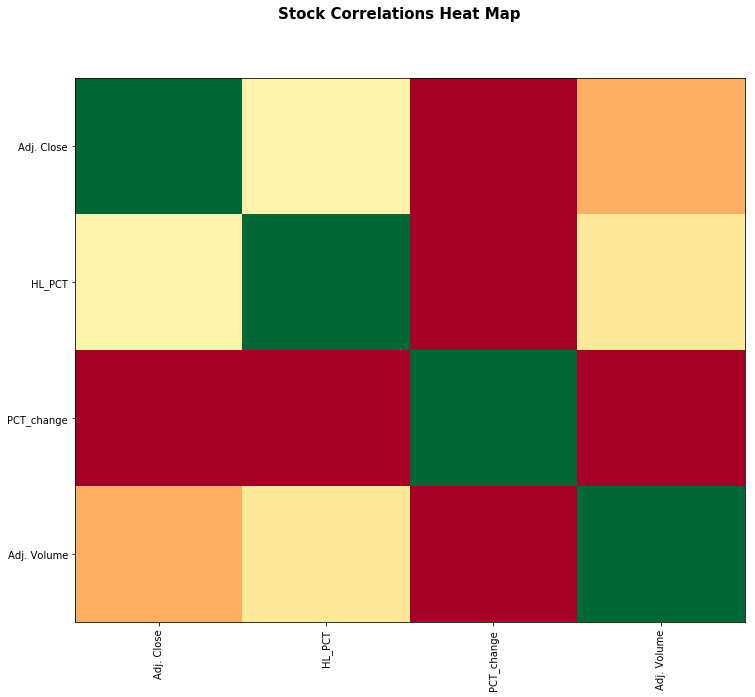

-------------------------------------------------
From the correlation heat map, we can tell that the corrlation bewteen percentage change column and price is
very low. So we need to get rid of this column to predict.


In [3]:
#plot heat map of corrlation
corr_stocks=df.corr()
corr_stocks=np.absolute(corr_stocks)
print(corr_stocks)
plt.figure(figsize=(12, 10))
plt.imshow(corr_stocks, cmap='RdYlGn', interpolation='none', aspect='auto')
plt.xticks(range(len(corr_stocks)), corr_stocks.columns, rotation='vertical')
plt.yticks(range(len(corr_stocks)), corr_stocks.columns);
plt.suptitle('Stock Correlations Heat Map', fontsize=15, fontweight='bold')
plt.show()
print('-------------------------------------------------')
print('From the correlation heat map, we can tell that the corrlation bewteen percentage change column and price is')
print('very low. So we need to get rid of this column to predict.')

In [4]:
#get rid of feature have least correlation
df = df[['Adj. Close','HL_PCT','Adj. Volume']]

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
#use high low price change and volume as two features
predictor=df[['HL_PCT','Adj. Volume']]
#normalize the predictor
predictor=preprocessing.scale(predictor)
price=df['Adj. Close']
predictor=np.array(predictor)
price=np.array(price)
#using 90% as training data and 10% as testing data
X_train, X_test, y_train, y_test =train_test_split(predictor , price, test_size=0.1,shuffle= False)
clf = linear_model.LinearRegression(n_jobs=-1)
clf.fit(X_train, y_train)
y_pred1 = clf.predict(X_test)
print('the coefficient of determination R^2 of the prediction:',clf.score(X_test, y_test))
print("Mean squared error:",mean_squared_error(y_test, y_pred1))

the coefficient of determination R^2 of the prediction: -11.3145295637
Mean squared error: 8372.27567007


the first varible is negative because the model can be arbitrarily worse

In [6]:
forecast_set = clf.predict(X_test)
num_samples = df.shape[0]
#add Forecase column to dataframe
df['Forecast'] = np.nan
df['Forecast'][int(0.9*num_samples):num_samples]=forecast_set

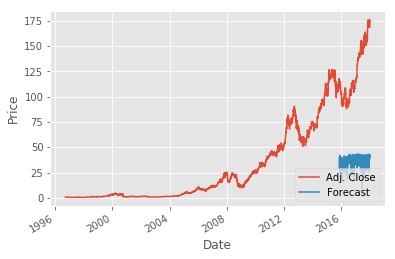

-------------------------
from predicion graph we can see that the prediction does not work well


In [7]:
#plot graph for actual stock price and 
style.use('ggplot')
df['Adj. Close'].plot()
df['Forecast'].plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.rcParams['figure.figsize'] = (20,20)
plt.show()
print('-------------------------')
print('from predicion graph we can see that the prediction does not work well')

### use price as one of the feature to predict price
We can see from previous prediction, even high related correlation featrues did not predict well. However, the highest related featrue is price itself. This time I want to use price as one of the feature to predict price.

In [8]:
predictor2=df[['Adj. Close','HL_PCT','Adj. Volume']]
predictor2=preprocessing.scale(predictor2)
clf2 = linear_model.LinearRegression(n_jobs=-1)
X_train2, X_test2, y_train2, y_test2 =train_test_split(predictor2 , price, test_size=0.1,shuffle= False)
clf2.fit(X_train2, y_train2)
forecast_set2 = clf2.predict(X_test2)
print('the coefficient of determination R^2 of the prediction:',clf2.score(X_test2, y_test2))
print("Mean squared error:",mean_squared_error(y_test, forecast_set2))
print('Mean squared error is almost 0, the prediction is very well.')

the coefficient of determination R^2 of the prediction: 1.0
Mean squared error: 9.84451225512e-28
Mean squared error is almost 0, the prediction is very well.


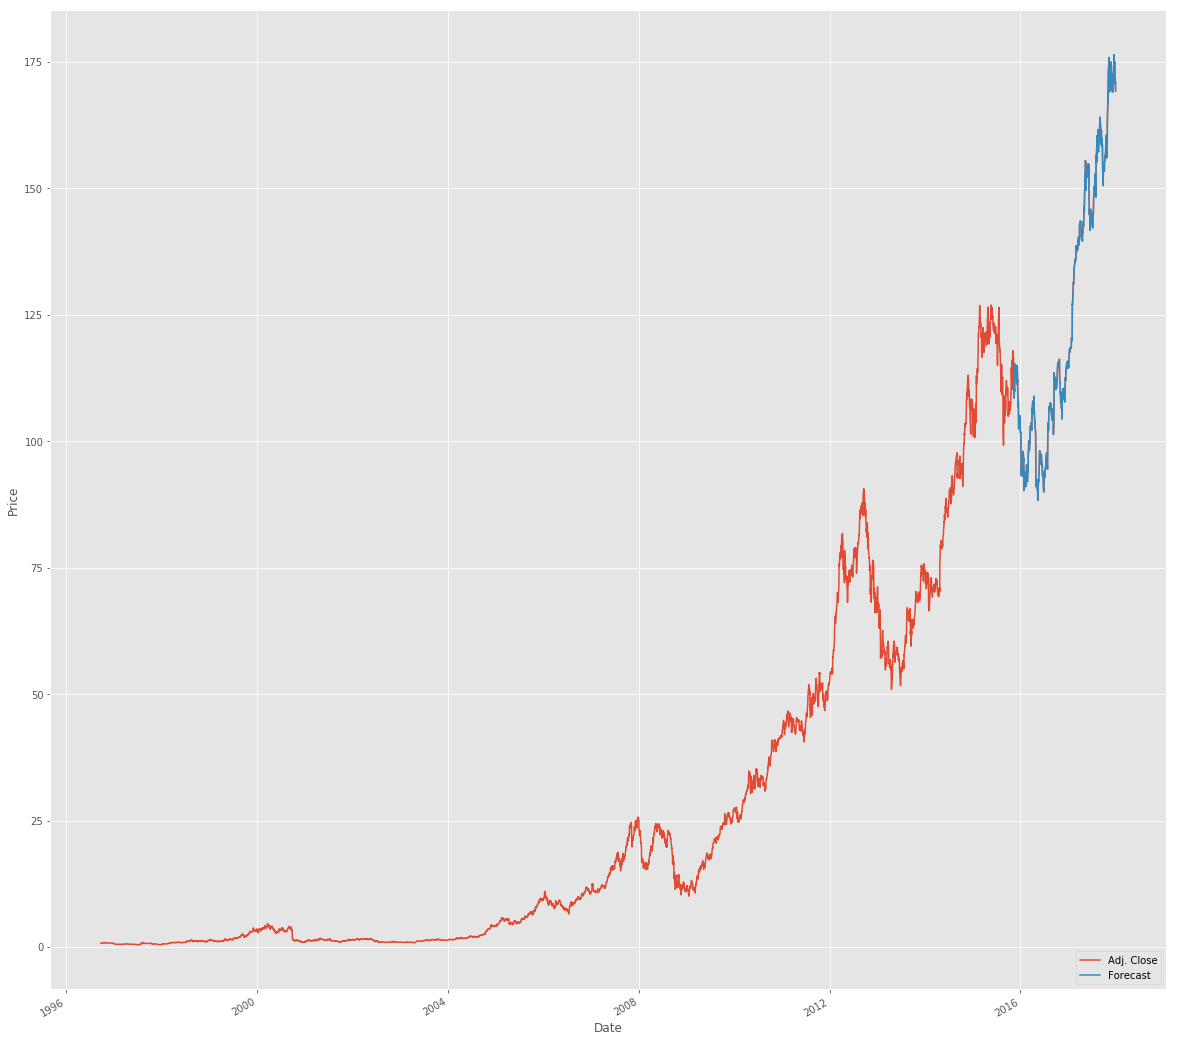

-------------------------
from predicion graph we can see that prediction works well.


In [9]:
num_samples = df.shape[0]
#add Forecase column to dataframe
df['Forecast'] = np.nan
df['Forecast'][int(0.9*num_samples):num_samples]=forecast_set2
style.use('ggplot')
df['Adj. Close'].plot()
df['Forecast'].plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.rcParams['figure.figsize'] = (20,20)
plt.show()
print('-------------------------')
print('from predicion graph we can see that prediction works well.')

### Use 30 days stock price to predict 31 days price
Because accounting price as a feature is 100% correlation to predict the price. so we can get almost 100% match prediction.
I think using previous price to predict future price is best way to predict.

In [10]:
from sklearn.linear_model import LinearRegression
price_data=pd.DataFrame(df_orig['Adj. Close'])
price_data.columns = ['values']
index=price_data.index
Date=index[60:5350]
x_data = []
y_data = []
for d in range(30,price_data.shape[0]):
    x = price_data.iloc[d-30:d].values.ravel()
    y = price_data.iloc[d].values[0]
    x_data.append(x)
    y_data.append(y)
    
x_data=np.array(x_data)
y_data=np.array(y_data)


In [11]:
y_pred = []
y_pred_last = []
y_pred_ma = []
y_true = []
end = y_data.shape[0]
for i in range(30,end):
 
    x_train = x_data[:i,:]
    y_train = y_data[:i]
    
    x_test = x_data[i,:]
    y_test = y_data[i]
 
 
    model = LinearRegression()
    model.fit(x_train,y_train)
    y_pred.append(model.predict(x_test.reshape(1, -1)))
    y_true.append(y_test)
    


In [12]:
#Transforms the lists into numpy arrays
y_pred = np.array(y_pred)
y_true = np.array(y_true)
from sklearn.metrics import mean_absolute_error

print ('\nMean Absolute Error')
print ('MAE Linear Regression', mean_absolute_error(y_pred,y_true))
print("Mean squared error:",mean_squared_error(y_true, y_pred))



Mean Absolute Error
MAE Linear Regression 0.435641130083
Mean squared error: 0.721270584007


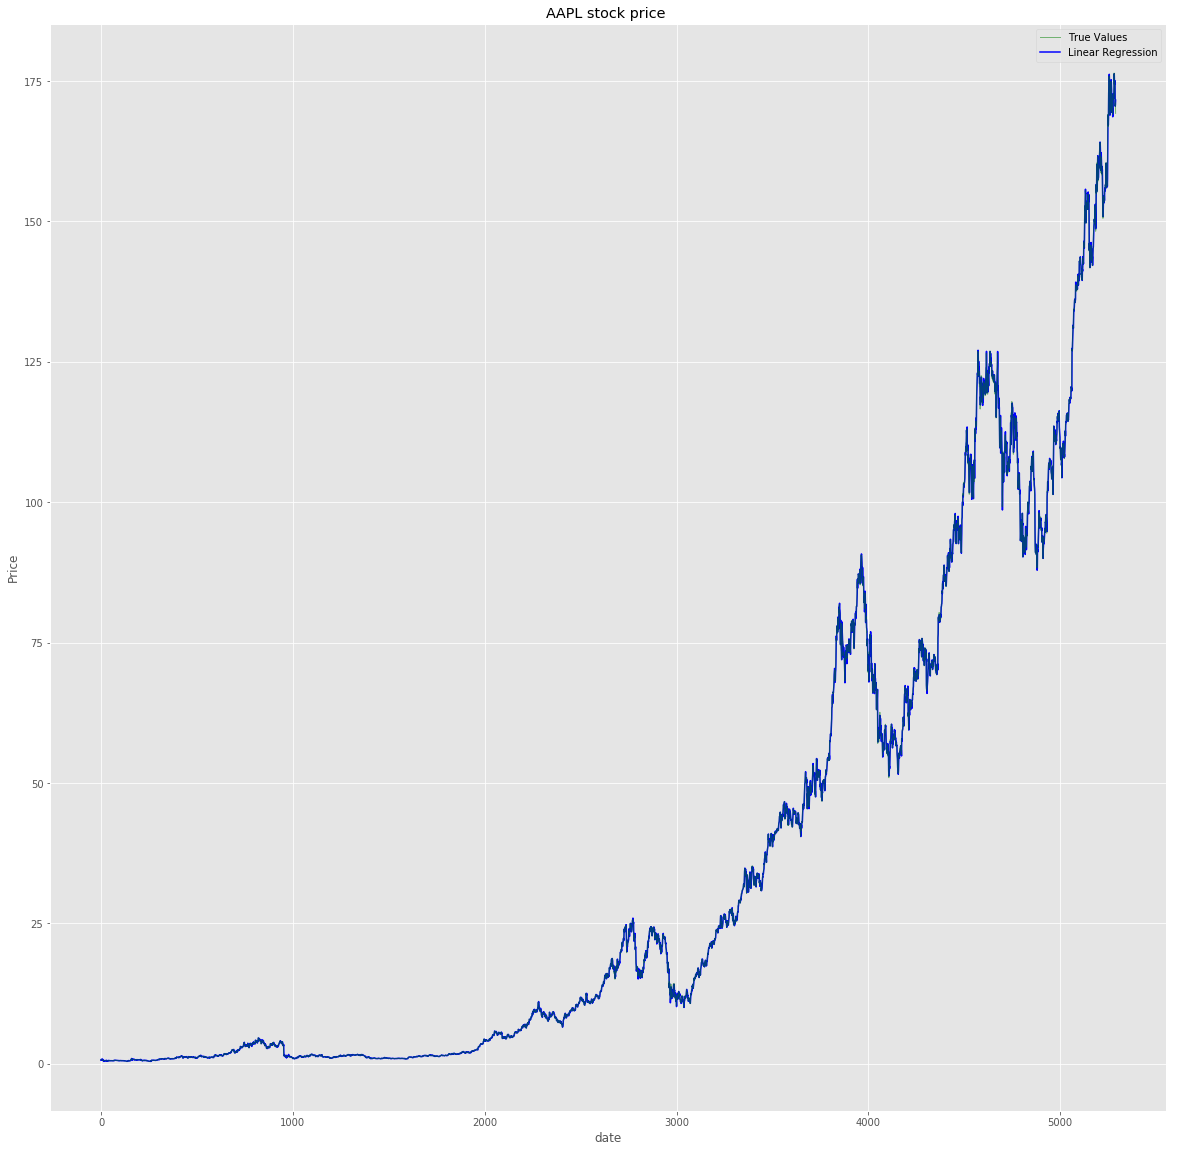

-------------------------
from predicion graph we can see that the prediction works well


In [13]:
plt.title('AAPL stock price ')
plt.ylabel('Price')
plt.xlabel(u'date')
reg_val, = plt.plot(y_pred,color='b',label=u'Linear Regression')
true_val, = plt.plot(y_true,color='g', label='True Values', alpha=0.5,linewidth=1)
plt.legend(handles=[true_val,reg_val])
plt.show()
print('-------------------------')
print('from predicion graph we can see that the prediction works well')

### Use financial fundamental data to predict stock price
I try to collect more financial fundamental data to predict stock price. To compare with previous 3 predictions, I collect apple quarterly revenue, yearly total assets, yearly gross profit and equity as key feature to forcast stock price.


In [14]:
#get apple revenue
revenue=quandl.get("SF1/AAPL_REVENUE_MRQ",start_date="1996-9-26",end_date='2017-12-31', authtoken="_1LjZZVx4HVVTwzCmqxg")
#get apple total assets
total_assets=quandl.get("SF1/AAPL_ASSETS_MRY",start_date="1996-9-26",end_date='2017-12-31', authtoken="_1LjZZVx4HVVTwzCmqxg")
#get apple gross profit
gross_profit=quandl.get("SF1/AAPL_GP_MRY",start_date="1996-9-26",end_date='2017-12-31', authtoken="_1LjZZVx4HVVTwzCmqxg")
#get apple shareholders equity
equity=quandl.get("SF1/AAPL_EQUITY_MRQ",start_date="1996-9-26",end_date='2017-12-31', authtoken="_1LjZZVx4HVVTwzCmqxg")
#change name of columns
revenue.columns = ['revenue']
total_assets.columns = ['total_assets']
gross_profit.columns = ['gross_profit']
equity.columns = ['equity']

In [15]:
fin_data=pd.concat([revenue,total_assets,gross_profit,equity],axis=1)
fin_data['date']=fin_data.index
#create quarter column and indicate the quater of data
fin_data['quarter'] = pd.to_datetime(fin_data['date']).dt.to_period('Q')
fin_data.drop('date', axis=1, inplace=True)
fin_data.head()

,revenue,total_assets,gross_profit,equity,quarter
Date,,,,,
1996-09-26,NaN,5.364000e+09,9.680000e+08,2.058000e+09,1996Q3
1996-12-27,2.129000e+09,NaN,NaN,NaN,1996Q4
1997-03-28,1.601000e+09,NaN,NaN,NaN,1997Q1
1997-06-27,1.737000e+09,NaN,NaN,NaN,1997Q2
1997-09-26,1.614000e+09,4.233000e+09,1.368000e+09,1.200000e+09,1997Q3


In [16]:
##handle NAN data in chart.
while fin_data['total_assets'].isnull().any():
    fin_data.loc[fin_data['total_assets'].isnull(),'total_assets'] = fin_data['total_assets'].shift(1)
    
while fin_data['gross_profit'].isnull().any():
    fin_data.loc[fin_data['gross_profit'].isnull(),'gross_profit'] = fin_data['gross_profit'].shift(1)
    
while fin_data['equity'].isnull().any():
    fin_data.loc[fin_data['equity'].isnull(),'equity'] = fin_data['equity'].shift(1)
    
fin_data=fin_data.fillna(method='bfill')
fin_data.head()

,revenue,total_assets,gross_profit,equity,quarter
Date,,,,,
1996-09-26,2.129000e+09,5.364000e+09,9.680000e+08,2.058000e+09,1996Q3
1996-12-27,2.129000e+09,5.364000e+09,9.680000e+08,2.058000e+09,1996Q4
1997-03-28,1.601000e+09,5.364000e+09,9.680000e+08,2.058000e+09,1997Q1
1997-06-27,1.737000e+09,5.364000e+09,9.680000e+08,2.058000e+09,1997Q2
1997-09-26,1.614000e+09,4.233000e+09,1.368000e+09,1.200000e+09,1997Q3


In [17]:
fin_price=pd.DataFrame(df['Adj. Close'])
fin_price.columns=['price']
fin_price['quarter'] = pd.to_datetime(fin_price.index,errors='coerce').to_period('Q')
fin_price2=fin_price
index=fin_price2.index
fin_price.head()

,price,quarter
Date,,
1996-09-26,0.718714,1996Q3
1996-09-27,0.716786,1996Q3
1996-09-30,0.712931,1996Q3
1996-10-01,0.791003,1996Q4
1996-10-02,0.758875,1996Q4


In [18]:
#combine two dataframe together, use quarter column as key to combine
fin_price1=fin_price.set_index('quarter').join(fin_data.set_index('quarter'))
fin_price1=fin_price1.dropna(axis=0)
fin_price1.head()

,price,revenue,total_assets,gross_profit,equity
quarter,,,,,
1996Q3,0.718714,2.129000e+09,5.364000e+09,968000000.0,2.058000e+09
1996Q3,0.716786,2.129000e+09,5.364000e+09,968000000.0,2.058000e+09
1996Q3,0.712931,2.129000e+09,5.364000e+09,968000000.0,2.058000e+09
1996Q4,0.791003,2.129000e+09,5.364000e+09,968000000.0,2.058000e+09
1996Q4,0.758875,2.129000e+09,5.364000e+09,968000000.0,2.058000e+09


In [19]:
print('check NAN in data\n',fin_price1.isnull().any())
#set up index to date.
fin_price1.set_index(index).head()

check NAN in data
 price           False
revenue         False
total_assets    False
gross_profit    False
equity          False
dtype: bool


,price,revenue,total_assets,gross_profit,equity
Date,,,,,
1996-09-26,0.718714,2.129000e+09,5.364000e+09,968000000.0,2.058000e+09
1996-09-27,0.716786,2.129000e+09,5.364000e+09,968000000.0,2.058000e+09
1996-09-30,0.712931,2.129000e+09,5.364000e+09,968000000.0,2.058000e+09
1996-10-01,0.791003,2.129000e+09,5.364000e+09,968000000.0,2.058000e+09
1996-10-02,0.758875,2.129000e+09,5.364000e+09,968000000.0,2.058000e+09


                 price   revenue  total_assets  gross_profit    equity
price         1.000000  0.933641      0.974148      0.952846  0.936805
revenue       0.933641  1.000000      0.939023      0.946652  0.951745
total_assets  0.974148  0.939023      1.000000      0.981990  0.948590
gross_profit  0.952846  0.946652      0.981990      1.000000  0.979000
equity        0.936805  0.951745      0.948590      0.979000  1.000000


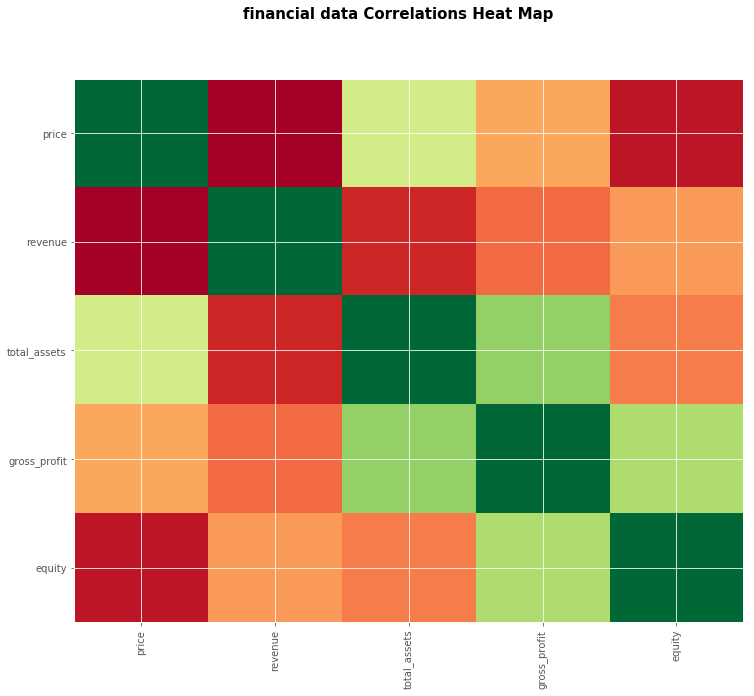

-------------------------
surprisingly the financial fundamental data show high related with price. the correlation are even higher
than daily market data.


In [20]:
##correlation heat map.
corr_other=fin_price1.corr()
print(corr_other)
plt.figure(figsize=(12, 10))
plt.imshow(corr_other, cmap='RdYlGn', interpolation='none', aspect='auto')
plt.xticks(range(len(corr_other)), corr_other.columns, rotation='vertical')
plt.yticks(range(len(corr_other)), corr_other.columns);
plt.suptitle('financial data Correlations Heat Map', fontsize=15, fontweight='bold')
plt.show()
print('-------------------------')
print('surprisingly the financial fundamental data show high related with price. the correlation are even higher')
print('than daily market data.')

In [21]:
##linear regression with all features
predictor3=fin_price1[['revenue','total_assets','gross_profit','equity']]
#normalize predictor
predictor3=preprocessing.scale(predictor3)
#print(predictor3)
clf3 = linear_model.LinearRegression(n_jobs=-1)
X_train3, X_test3, y_train3, y_test3 =train_test_split(predictor3 , fin_price1['price'], test_size=0.1,shuffle= False)
clf3.fit(X_train3, y_train3)
forecast_set3 = clf3.predict(X_test3)
print('confident:',clf3.score(X_test3, y_test3))
print("Mean squared error:",mean_squared_error(y_test3, forecast_set3))
print('Mean squared error is accpetable.')

confident: 0.512452784798
Mean squared error: 373.766215591
Mean squared error is accpetable.


/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:164: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


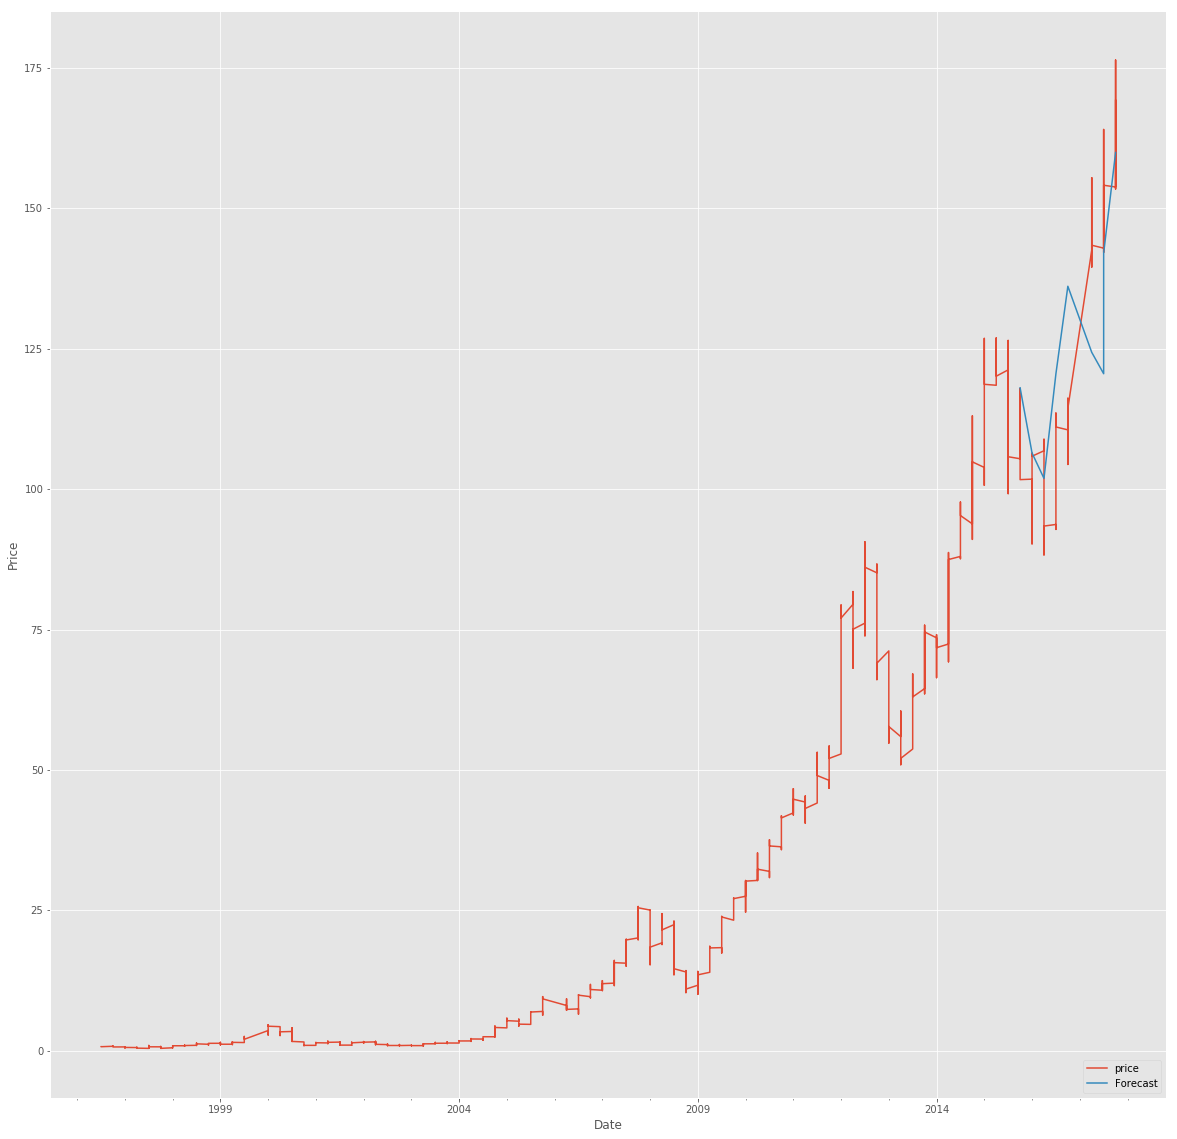

-------------------------
our prediction fit the major trend of stock price


In [22]:
num_samples3 = fin_price1.shape[0]
#add Forecase column to dataframe
fin_price1['Forecast'] = np.nan
fin_price1['Forecast'][int(0.9*num_samples3):num_samples3]=forecast_set3
fin_price1['price'].plot()
fin_price1['Forecast'].plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.rcParams['figure.figsize'] = (20,20)
plt.show()
print('-------------------------')
print('our prediction fit the major trend of stock price')

### Use PCA to reduce the number of features to two
Trying to use PCA to processing the features and test accuracy.

In [23]:
# Use PCA to reduce the number of features to two, and test.
from sklearn.decomposition import PCA
#reduce 4 featrues to 2
pca = PCA(n_components=2)
predictor3=pca.fit_transform(predictor3)
print(predictor3.shape)
clf4 = linear_model.LinearRegression(n_jobs=-1)
X_train4, X_test4, y_train4, y_test4 =train_test_split(predictor3 , fin_price1['price'], test_size=0.1,shuffle= False)
clf4.fit(X_train4, y_train4)
forecast_set4 = clf4.predict(X_test4)
confidence3=clf4.score(X_test4, y_test4)
print('confident:',confidence3)
print("Mean squared error:",mean_squared_error(y_test4, forecast_set4))
print('After use PCA, the prediction is worse.')

(5350, 2)
confident: -0.244780217742
Mean squared error: 954.2804814
After use PCA, the prediction is worse.


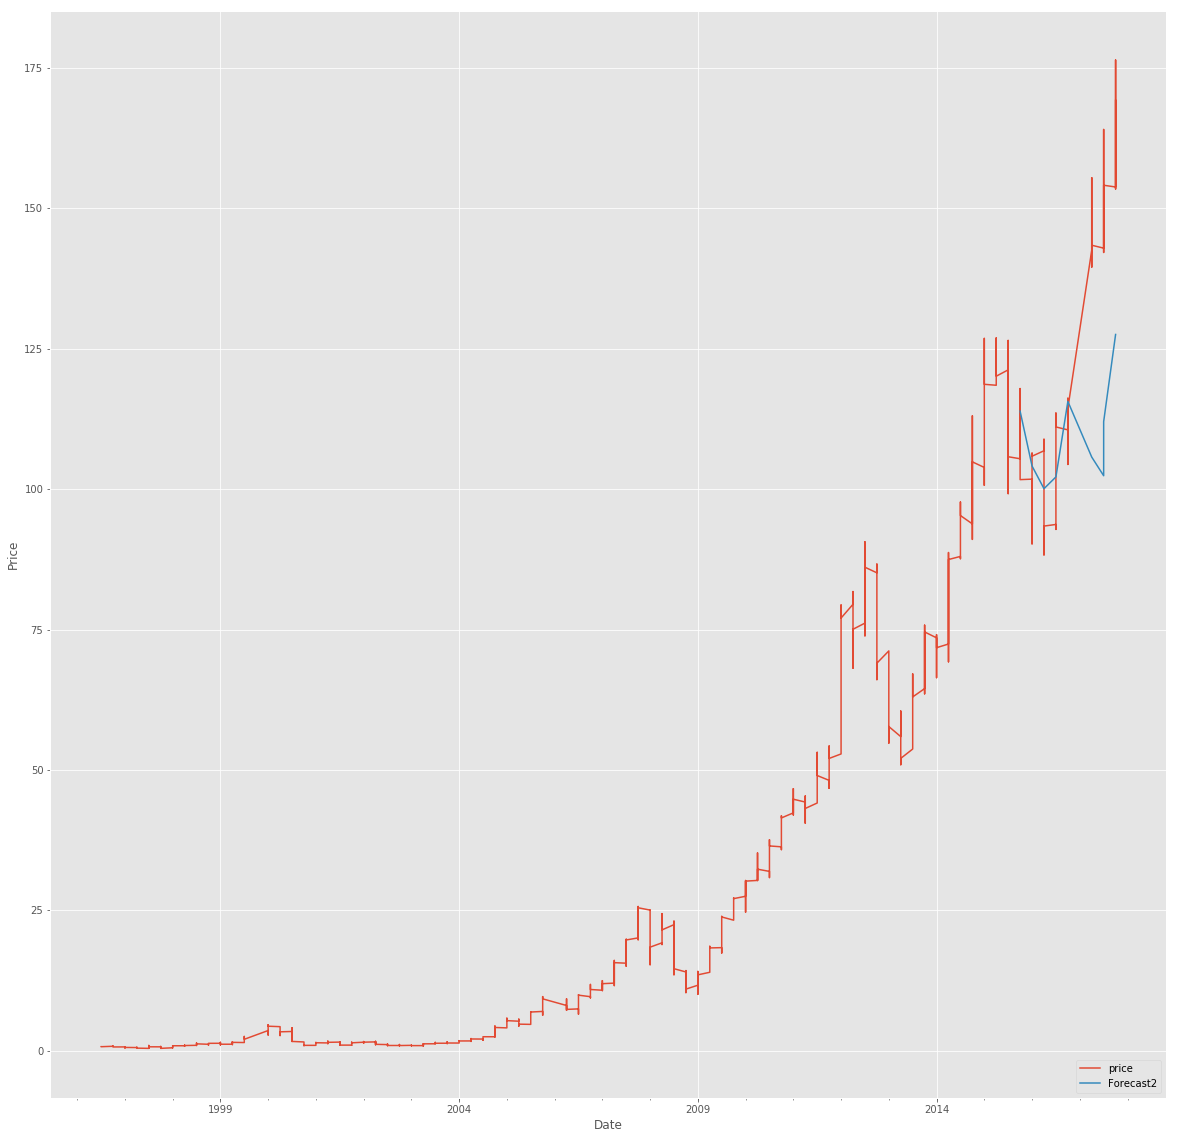

In [24]:
num_samples4 = fin_price1.shape[0]
#add Forecase column to dataframe
fin_price1['Forecast2'] = np.nan
fin_price1['Forecast2'][int(0.9*num_samples3):num_samples3]=forecast_set4
style.use('ggplot')
fin_price1['price'].plot()
fin_price1['Forecast2'].plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.rcParams['figure.figsize'] = (20,20)
plt.show()

## Conclusion
In this project, we applied linear regression learning techniques in predicting the stock
price trend of a single stock. Our finds can be summarized into three aspects:

1, I used several features including daily market data and financial fundamental data to predict s ingle stock price.
I found use price itself to predict price can get best accuracy.

2, Financial fundamental data is also useful. It means when company gets better financial report, the stock price will benefit from it.

3, Use PCA to processing data seems only work for classification Prediction.

## Future work
1, Test our predictor on different stocks to see its robustness. Try to develop a
“more general” predictor for the stock market.

2, Construct a portfolio of multiple stocks in order to diversify the risk. Take
transaction cost into account when evaluating strategy’s effectiveness.